## Importing of packages/modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Import raw data and Pre-Process for algorithm

In [2]:
# Raw data held in a csv file which contains data regarding defence spending broken down by year and European county.
# Data taken from The Organisation for Economic Co-operation and Development.

oecd = pd.read_csv ('OECD_Defence_Copy.csv')

In [3]:
# Drop unneeded columns from the data

oecd_new = oecd.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'],axis=1)

In [4]:
# Replace names of countries with full country name, will enable easier merging of dataframes later.

oecd_new = oecd_new.replace(['GRC', 'NLD', 'DEU', 'CZE', 'ITA', 'PRT', 'CHE', 'POL', 'SVK', 'SVN', 'IRL', 'BEL', 'ISL', 'SWE', 'ESP', 'NOR', 'AUT', 'EST', 'FRA', 'LUX', 'HUN', 'DNK', 'GBR', 'FIN', 'LVA', 'LTU'],
                             ['Greece', 'Netherlands', 'Germany', 'Czech Republic', 'Italy', 'Portugal', 'Switzerland', 'Poland', 'Slovak Republic', 'Slovenia', 'Ireland', 'Belgium', 'Iceland', 'Sweden', 'Spain', 'Norway', 'Austria', 'Estonia', 'France', 'Luxembourg', 'Hungry', 'Denmark', 'United Kingdom', 'Finland', 'Latvia', 'Lithuania'])

In [5]:
# Import Global Terror (GTD) dataset using pandas .read function to read in the .xlsx file into a dataframe.

global_terror = pd.read_excel ('Global_Terror.xlsx')

In [6]:
# Assign rows in dataset which take place before 1988 to varible 'index_names'

index_names = global_terror[ global_terror['iyear'] <= 1998 ].index

In [7]:
# Drop above from dataset

global_terror.drop(index_names, inplace = True)

In [8]:
# Assign some rows not belonging to western europe to varible called 'index_names2'

index_names2 = global_terror[ global_terror['region'] <=7].index

In [9]:
# Drop the above from data set

global_terror.drop(index_names2, inplace = True)

In [10]:
index_names3 = global_terror[ global_terror['region'] >=9].index

In [11]:
global_terror.drop(index_names3, inplace = True)

In [12]:
cols = [3,4,6,9,10,11,12,13,14,16,17,18,22,23,24,30,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,
        56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,
       95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,
       125,126,127,128,129,130,131,132,133,134]

In [13]:
# Drop columns of dataset which do not add anything to our dataframe. Focus here is on features which we could arguably be
# known before an attack were to take place.

global_terror = global_terror.drop(global_terror.columns[cols], axis=1)

In [14]:
# Merge our two data frames, GTD dataframe and our OECD (Defence Spending by European Country) dataframe.

global_terror = global_terror.merge(oecd_new, left_on=['country_txt', 'iyear'], right_on=['LOCATION', 'TIME'])

In [15]:
# Drop repeated columns as a result of the merge

global_terror = global_terror.drop(['LOCATION', 'TIME'],axis=1)

In [16]:
# Rename column to reflect the values held in that column

global_terror = global_terror.rename(columns = {'Value':'Defence Spending GDP%'})

### Useful website used: 
### https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm

In [17]:
# Further dropping of columns which either have repeated information or hold no benefit for our algorithm

global_terror = global_terror.drop(['eventid', 'iyear', 'country', 'attacktype1', 'targtype1'],axis=1)

In [18]:
# Replace values in column which records number of unknown attackers with Null or None.

global_terror.loc[(global_terror.nperps == -99),'nperps']= None

In [19]:
# Input the mean number of attackers for our whole dataframe into our Null cells.

global_terror.nperps.fillna(global_terror.nperps.mean(), inplace=True)

In [20]:
# Replace the columns which contain catagorical text names with binary columns. Same applies to two of the cells below.

country = pd.get_dummies(global_terror.country_txt, prefix = 'Country')

In [21]:
# Example of the results from the method used above.

country

,Country_Austria,Country_Belgium,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Ireland,Country_Italy,Country_Netherlands,Country_Norway,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3780,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3781,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
attacktype = pd.get_dummies(global_terror.attacktype1_txt, prefix = 'AttackType')

In [23]:
targettype = pd.get_dummies(global_terror.targtype1_txt, prefix = 'TargType')

In [24]:
# Add new binary columns to our dataframe and at the same time drop the column which we used to generate the new binary
# columns. The same applies to the following two cells also.

global_terror = global_terror.join(country)
global_terror.drop(['country_txt'], axis=1, inplace=True)

In [25]:
global_terror = global_terror.join(attacktype)
global_terror.drop(['attacktype1_txt'], axis=1, inplace=True)

In [26]:
global_terror = global_terror.join(targettype)
global_terror.drop(['targtype1_txt'], axis=1, inplace=True)

In [27]:
# Check that there are no null cells in our dataframe

global_terror[pd.isnull(global_terror).any(axis=1)]

,imonth,extended,specificity,crit1,crit2,crit3,multiple,success,suicide,nperps,...,TargType_Police,TargType_Private Citizens & Property,TargType_Religious Figures/Institutions,TargType_Telecommunication,TargType_Terrorists/Non-State Militia,TargType_Tourists,TargType_Transportation,TargType_Unknown,TargType_Utilities,TargType_Violent Political Party


In [28]:
# Our resulting dataframe following manual data pre-processing

global_terror

,imonth,extended,specificity,crit1,crit2,crit3,multiple,success,suicide,nperps,...,TargType_Police,TargType_Private Citizens & Property,TargType_Religious Figures/Institutions,TargType_Telecommunication,TargType_Terrorists/Non-State Militia,TargType_Tourists,TargType_Transportation,TargType_Unknown,TargType_Utilities,TargType_Violent Political Party
0,1,0,1.0,1,1,1,0,1,0,5.022923,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.0,1,1,1,0,1,0,5.022923,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1.0,1,1,1,0,0,0,5.022923,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1.0,1,1,1,1,1,0,5.022923,...,0,0,0,0,0,0,0,0,0,0
4,3,0,1.0,1,1,1,1,0,0,5.022923,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,9,0,1.0,1,1,0,0,1,0,1.000000,...,0,0,0,0,0,0,0,0,0,0
3779,4,0,1.0,1,1,1,0,0,0,5.022923,...,0,0,0,0,0,0,0,0,0,0
3780,8,0,1.0,1,1,1,0,1,0,2.000000,...,0,0,0,0,0,0,0,0,0,0
3781,8,0,1.0,1,1,1,0,1,0,5.022923,...,1,0,0,0,0,0,0,0,0,0


## Train and Test split

In [29]:
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [30]:
# Set our X and Y variables. Y is the class which we want to predict and X is the remainder of the data with that class
# removed.

y = global_terror.success.copy()
X = global_terror.drop(['success'], axis=1)

In [31]:
# Use the train_test_split function from the sklearn library. Set the training data size to 80%, test to 20%.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123)

In [32]:
# Preprocessing method from sklearn which is used to normalise our data.

scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# A for loop is used to loop through the different k values which we use up to 14. We store the accuracy score for each
# K value in a list called 'outcome'.  

K_range = range(1,15)
outcome = []

for k in K_range:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   outcome.append(metrics.accuracy_score(y_test,y_pred))


print(outcome)

[0.8058124174372523, 0.7490092470277411, 0.8269484808454426, 0.808454425363276, 0.8388375165125496, 0.8282694848084544, 0.8388375165125496, 0.8414795244385733, 0.8428005284015853, 0.8414795244385733, 0.8414795244385733, 0.8388375165125496, 0.8520475561426685, 0.8388375165125496]


Text(0, 0.5, 'Accuracy')

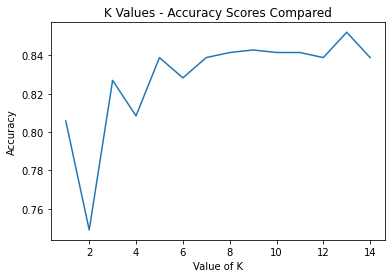

In [34]:
# We can then plot the accuracy levels for each of our K values on a graph to easily see which is the most accurate.

plt.plot(K_range,outcome)
plt.title('K Values - Accuracy Scores Compared')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [35]:
# Run our model using the best K value, in our case this was 13.

model = KNeighborsClassifier(n_neighbors = 13)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [36]:
# We check to see how our model performed at a glance.

y_pred = pd.Series(model.predict(X_test))

y_test = y_test.reset_index(drop=True)
check = pd.concat([y_test, y_pred], axis=1)
check.columns = ['True', 'Prediction']
check.head()

,True,Prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [37]:
# Using the accuracy function within the python sklearn.metrics module we can measure the 
# algorithm's performance. 

print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8520475561426685


In [38]:
# import seaborn which allows data visualization

import seaborn as sns

Text(0.5, 15.0, 'Predicted')

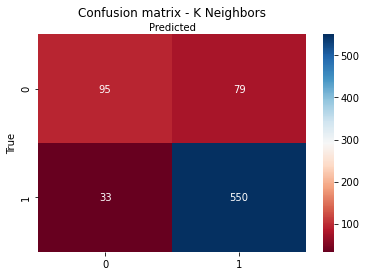

In [39]:
# Confusion matrix is used to demonstrate how many predictions were correct or not. Split in to 4 section for true positive,
# false positive, true negative and false negative.

confusion = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange (len(labels))
plt.xticks (tick_marks, labels)
plt.yticks (tick_marks, labels)

sns.heatmap(pd.DataFrame (confusion), annot=True, cmap="RdBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title ("Confusion matrix - K Neighbors", y=1.1)
plt.ylabel ("True")
plt.xlabel ("Predicted")

Text(0.5, 1.0, 'ROC Curve - K Neighbors')

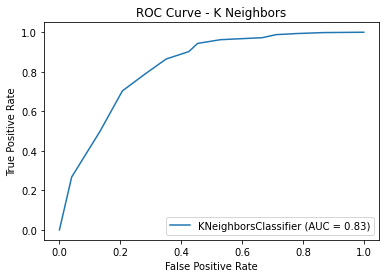

In [40]:
# Lastly we use what is known as a ROC (Receiver Operating Characteristic) curve as another method to 
# visualise the accuracy of our model.   

metrics.plot_roc_curve(model,X_test,y_test)
plt.title ("ROC Curve - K Neighbors")